[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
[23.23 22.32 18.62 13.27  8.98  6.71  5.84  5.44  5.19  5.01  4.88  4.8
  4.75  4.72  4.69  4.67  4.63  4.58  4.53  4.48  4.44  4.4   4.36  4.32
  4.29  4.26  4.23  4.2   4.18  4.15  4.13  4.11  4.09  4.07  4.05  4.03
  4.02  4.    3.98  3.97  3.95  3.94  3.93  3.92  3.9   3.89  3.88  3.87
  3.86  3.85  3.84  3.83]
[7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4
 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4
 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4 7.4]


<ipython-input-6-111b9d0c5806>:90: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([OURS,BF], labels=["PLR","BF", "PLR-ORIG"], frameon=False,loc="upper center", bbox_to_anchor=(0.48, 1.23),ncol=3, handlelength=1, columnspacing=1, handletextpad=0.2,fontsize=20)


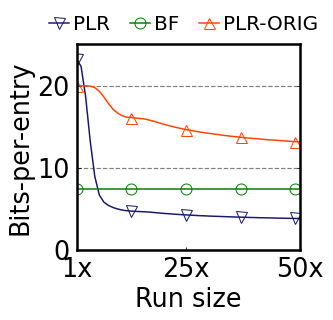

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from brokenaxes import brokenaxes 
from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib as mat
###해당 부분은 입력해주셔야하는 부분입니다.
###xlsx 파일의 경우 양식에 맞추어 작성해주세요!! 




#workload의 개수 입력, workname_list는 각각의 workload name을 작성.  
workload_num = 1
workname_list = ["BF-PLR"] #반드시 workname_list elem 개수와 workload num이 일치해야함. 
#workname_list = ["TPC-H"]
result_path ="data.xlsx" #분석위한 xlsx파일 path 입력
#sheet_name = "16_fio"#분석할 sheet name 입력 
sheet_name = "new_data"
output_path = "" # default: ""
output_name = "OURS-BF-PLR" 
#output_name = "TPCH"

def extract_xy(idx, path, sheet_name):
	start_int = 2
	df_from_excel = pd.read_excel(path,
							  sheet_name = sheet_name,
							  header = 2,
							  usecols=[start_int,start_int+1, start_int+2, start_int+3]
					)
	x = np.array(df_from_excel["density"])
	y1 = np.array(df_from_excel["OURS"])		
	y2 = np.array(df_from_excel['BF'])
	y3 = np.array(df_from_excel['PLR'])
	return x, y1, y2, y3

x, y1, y2, y3 = extract_xy("0", result_path, sheet_name)

print(x)
print(y1)
print(y2)
#일단 넣어놓은 코드 
#font = FontProperties()
#font.set_family('serif')
#font.set_name('Droid Sans')

#figure size=(16,4) subgraph가 4개이기 때문에 각각 4,4로 크기 맞추기 위해 설정
fig = plt.figure(figsize=(4,3.785))
fsize = 25.5
matplotlib.rc('axes', linewidth=2.5)
font = "Times New Roman"
#font = "Helvetica"
csfont = {'fontname':'Times New Roman'}

#import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# mat.rcParams["font.family"] = "Times New Roman"

"""
mat.rcParams["font.family"] = "Times New Roman"

if font == "Times New Roman":
    plt.rcParams["font.family"] = "Times New Roman"
    mat.rcParams['font.family'] = 'serif'
    #plt.rcParams['font.serif'] = ['Times New Roman']
    mat.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
"""


OURS = plt.plot(x, y1, linewidth=1.5, color="midnightblue", markerfacecolor="None",marker='v', markersize=11, markevery=[0,12,24,36,48])
BF = plt.plot(x, y2, linewidth=1.5, color="green", markerfacecolor="None",marker='o', markersize=11, markevery=[0,12,24,36,48])
PLR = plt.plot(x, y3, linewidth=1.5, color="orangered", markerfacecolor="None",marker='^', markersize=11, markevery=[0,12,24,36,48])
#subplot 생성, 4개, 각 subplot draw object를 sub_list에 넣음
plt.xlabel("Run size", fontsize=fsize)
plt.ylabel("Bits-per-entry", fontsize=fsize)
plt.xlim([1,50])
plt.ylim([0,25])
plt.yticks([0,10,20], fontsize=fsize, x=-0.015)
plt.xticks([1,25,50],["1x", "25x", "50x"], fontsize=fsize, y=-0.015)
#plt.xtickslabel([0,5,10,15,20])
plt.grid(axis='y', color='grey',linestyle='--',linewidth=1.2,zorder=0)
plt.rc('axes', axisbelow=True)

plt.tick_params(axis='y',direction='in', right=True)
plt.tick_params(axis='x', direction='in')

plt.legend([OURS,BF], labels=["PLR","BF", "PLR-ORIG"], frameon=False,loc="upper center", bbox_to_anchor=(0.48, 1.23),ncol=3, handlelength=1, columnspacing=1, handletextpad=0.2,fontsize=20)
#fig.legend(tmp_list[:6], labels=["PAGE","COARSE","FINE","SFTL", "TPFTL", "APPX"], frameon=False,loc="lower right", bbox_to_anchor=(0.91,0.09),ncol=1, fontsize=13)
plt.draw()

plt.savefig(output_path+output_name+".eps", format='eps', dpi=600, bbox_inches = "tight")
plt.savefig(output_path+output_name+".png", format='png', dpi=600, bbox_inches = "tight")
